# Step 1: Install Dependencies

In [1]:
# Install the latest versions of necessary libraries
!pip install -Uq bitsandbytes transformers accelerate datasets
!pip install -q git+https://github.com/huggingface/diffusers.git

# Download the training script
!wget -q https://raw.githubusercontent.com/huggingface/diffusers/main/examples/dreambooth/train_dreambooth.py

print("✅ Dependencies installed and script downloaded.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Step 2: Mount Google Drive

In [2]:
import os
from google.colab import drive

# --- Mount Google Drive to access your images ---
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Copy images to a local training folder
!mkdir -p /content/data/face
!cp /content/drive/MyDrive/Colab_Notebooks/Computer_Vision/Assignment08_SD_GEN/Images/Images_v2/* /content/data/face/

# Step 3: Configure Training Model

In [4]:
# --- Main Configuration ---

# 1. CHOOSE A BASE MODEL
# Other popular options: "runwayml/stable-diffusion-v1-5", "SG161222/Realistic_Vision_V5.1_noVAE","SG161222/Realistic_Vision_V2.0"
model_path = "runwayml/stable-diffusion-v1-5"

# 2. SETUP YOUR GOOGLE DRIVE PATHS
# IMPORTANT: This must be the path to the folder containing your portrait images.
instance_data_path = "/content/data/face"

# This is where the final trained model will be saved in your Google Drive.
output_dir_path = "/content/dreambooth-finetuned-sks-person"

# 3. DEFINE YOUR PROMPTS
# This is your unique identifier. "sks" is the keyword, "person" is the class.
instance_prompt = "a photo of a sks person"
'''
# This is used for prior preservation to prevent the model from forgetting what a 'person' is.
class_prompt = "a photo of a person"
'''

# --- Create directories and clean up ---
os.makedirs(output_dir_path, exist_ok=True)
'''
# This path is used for prior preservation images, which are generated automatically.
class_data_path = "/content/class-images"
os.makedirs(class_data_path, exist_ok=True)
'''
print(f"✅ Configuration complete.")
print(f"✅ Base Model: {model_path}")
print(f"✅ Your Images Path: {instance_data_path}")
print(f"✅ Model Output Path: {output_dir_path}")
print(f"✅ Instance Prompt: '{instance_prompt}'")

✅ Configuration complete.
✅ Base Model: runwayml/stable-diffusion-v1-5
✅ Your Images Path: /content/data/face
✅ Model Output Path: /content/dreambooth-finetuned-sks-person
✅ Instance Prompt: 'a photo of a sks person'


# Step 4: Run DreamBooth Fine-Tuning


In [6]:
!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path="{model_path}" \
  --instance_data_dir="{instance_data_path}" \
  --output_dir="{output_dir_path}" \
  --instance_prompt="{instance_prompt}" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --gradient_checkpointing \
  --learning_rate=5e-6 \
  --max_train_steps=400 \
  --lr_scheduler="constant" \
  --use_8bit_adam \
  --seed="1339" \
  --train_text_encoder \
  --mixed_precision="fp16"
  # --with_prior_preservation --prior_loss_weight=1.0 \
  # --class_prompt="{class_prompt}" \
  # --class_data_dir="{class_data_path}" \
  # --num_class_images=50

print(f"✅ Training complete! Your fine-tuned model is in: {output_dir_path}")

ipex flag is deprecated, will be removed in Accelerate v1.10. From 2.7.0, PyTorch has all needed optimizations for Intel CPU and XPU.
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2025-06-30 16:56:04.043222: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751302564.064398    3009 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751302564.070909    3009 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attemp

# Step 5: Load the Standalone Model


Loading your complete, fine-tuned model directly from: /content/dreambooth-finetuned-sks-person


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


✅ Your fine-tuned model was loaded successfully!

Generating for prompt: 'A photo of sks person in a futuristic city at sunset, cinematic lighting, highly detailed, 8k'


  0%|          | 0/30 [00:00<?, ?it/s]

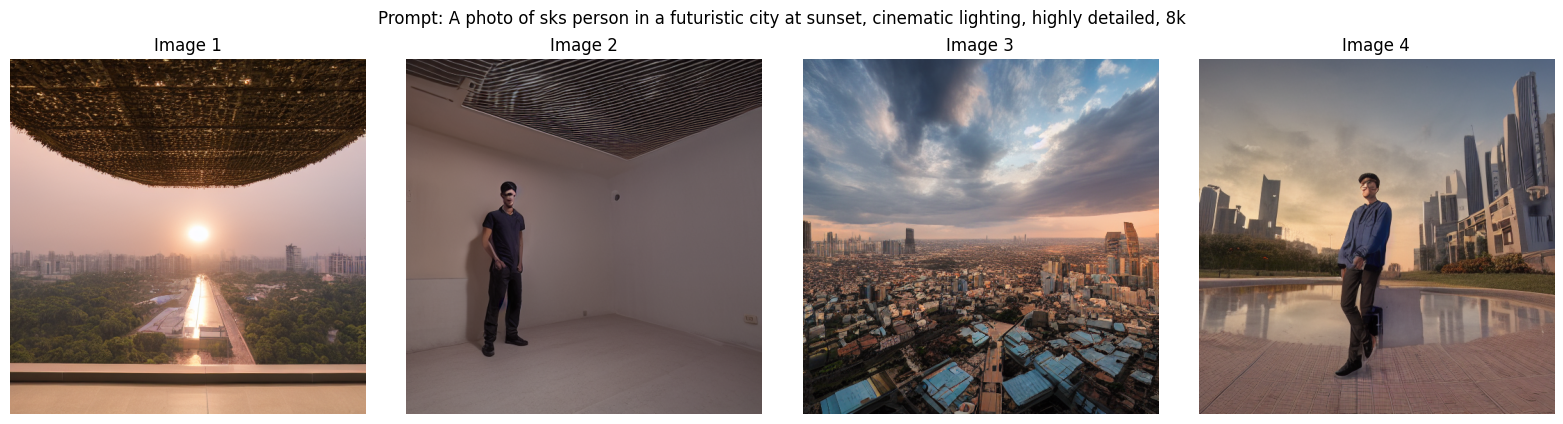


Generating for prompt: 'A portrait of sks person wearing traditional clothes, beautiful painting, sharp focus, artstation'


  0%|          | 0/30 [00:00<?, ?it/s]

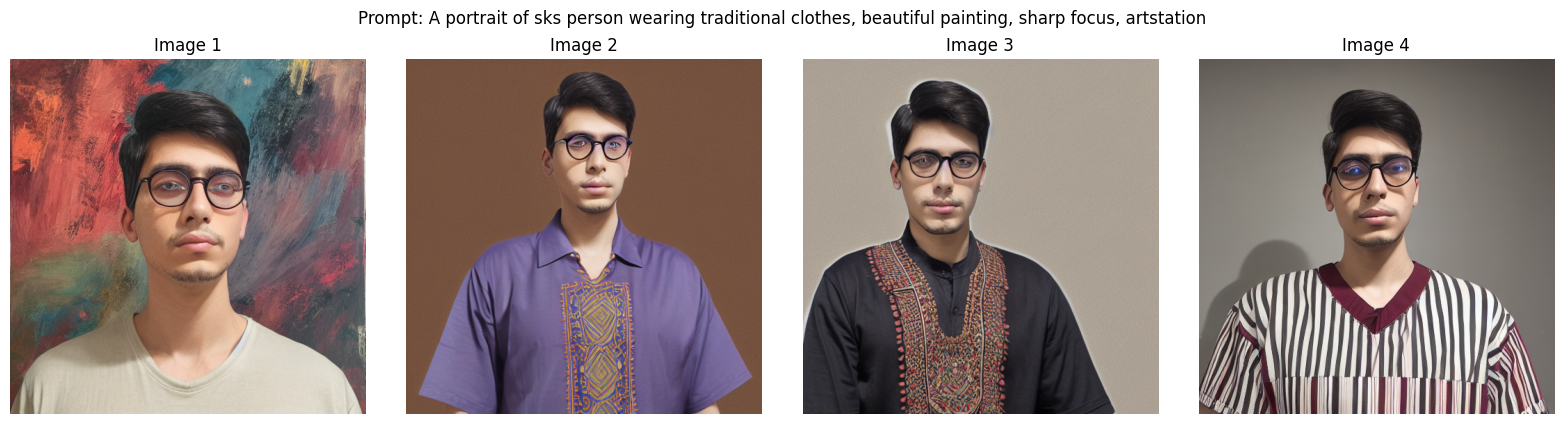

In [13]:
from PIL import Image
import torch
from diffusers import DiffusionPipeline, EulerDiscreteScheduler
import matplotlib.pyplot as plt
import os

# --- Load Your Model Directly From Your Output Folder ---
output_dir_path = "/content/dreambooth-finetuned-sks-person"
print(f"Loading your complete, fine-tuned model directly from: {output_dir_path}")

pipe = DiffusionPipeline.from_pretrained(
    output_dir_path,
    torch_dtype=torch.float16,
    safety_checker=None
).to("cuda")

pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)
print("✅ Your fine-tuned model was loaded successfully!")

# --- Run Inference with Your Model ---
prompts_to_test = [
    "A photo of sks person in a futuristic city at sunset, cinematic lighting, highly detailed, 8k",
    "A portrait of sks person wearing traditional clothes, beautiful painting, sharp focus, artstation"
]

for prompt in prompts_to_test:
    print(f"\nGenerating for prompt: '{prompt}'")
    g_cuda = torch.Generator(device='cuda').manual_seed(torch.initial_seed() + 1)  # Use a different seed each time

    images = pipe(
        prompt,
        height=512,
        width=512,
        negative_prompt="blurry, ugly, deformed, low quality, duplicate",
        num_images_per_prompt=4,
        num_inference_steps=30,
        guidance_scale=7.5,
        generator=g_cuda
    ).images

    # Display images using matplotlib
    plt.figure(figsize=(16, 8))  # Set figure size for 2x4 grid
    for i, img in enumerate(images, 1):
        plt.subplot(2, 4, i)
        plt.imshow(img)
        plt.title(f"Image {i}")
        plt.axis('off')
    plt.suptitle(f"Prompt: {prompt}", fontsize=12)
    plt.tight_layout()
    plt.show()

Loading your complete, fine-tuned model directly from: /content/dreambooth-finetuned-sks-person


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


✅ Your fine-tuned model was loaded successfully!

Generating for prompt: 'A photo of sks person in a futuristic city at sunset'


  0%|          | 0/30 [00:00<?, ?it/s]

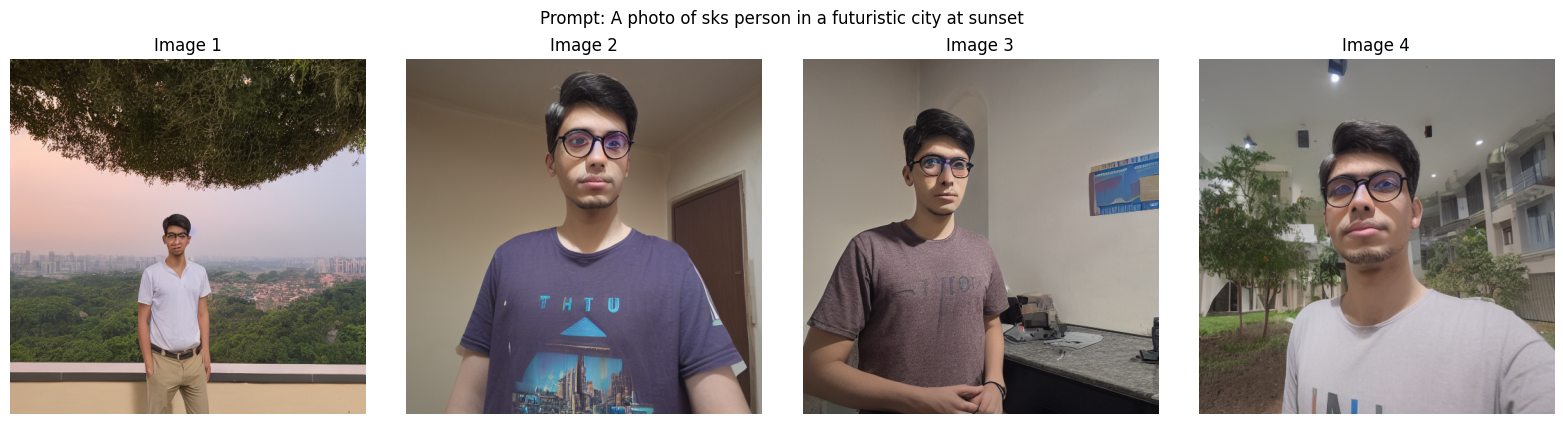


Generating for prompt: 'A portrait of sks person wearing traditional clothes'


  0%|          | 0/30 [00:00<?, ?it/s]

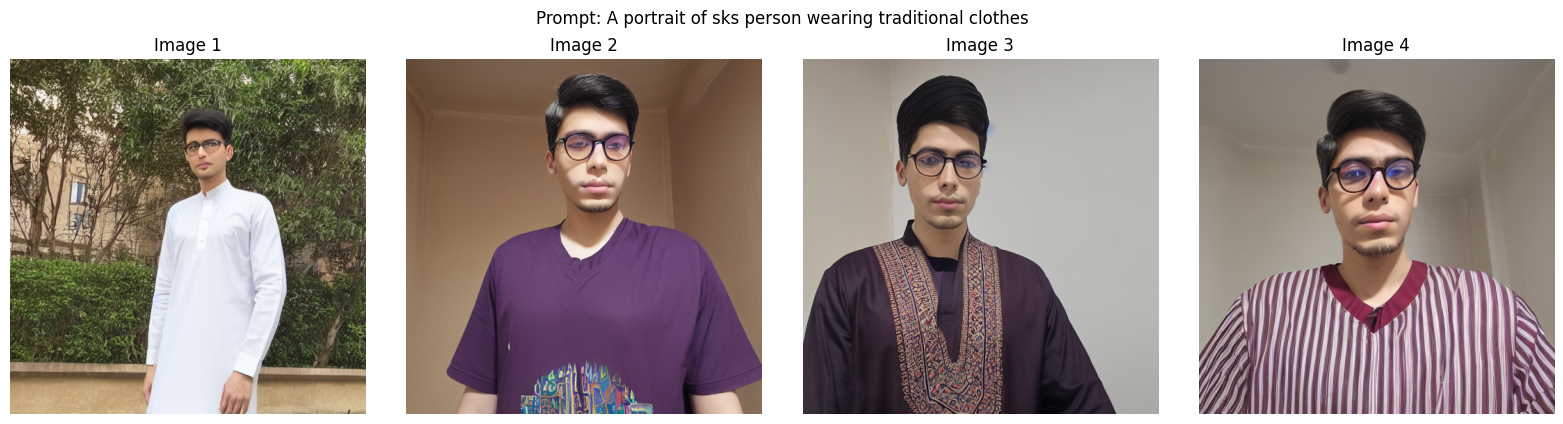

In [12]:
from PIL import Image
import torch
from diffusers import DiffusionPipeline, EulerDiscreteScheduler
import matplotlib.pyplot as plt
import os

# --- Load Your Model Directly From Your Output Folder ---
output_dir_path = "/content/dreambooth-finetuned-sks-person"
print(f"Loading your complete, fine-tuned model directly from: {output_dir_path}")

pipe = DiffusionPipeline.from_pretrained(
    output_dir_path,
    torch_dtype=torch.float16,
    safety_checker=None
).to("cuda")

pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)
print("✅ Your fine-tuned model was loaded successfully!")

# --- Run Inference with Your Model ---
prompts_to_test = [
    "A photo of sks person in a futuristic city at sunset",
    "A portrait of sks person wearing traditional clothes"
]

for prompt in prompts_to_test:
    print(f"\nGenerating for prompt: '{prompt}'")
    g_cuda = torch.Generator(device='cuda').manual_seed(torch.initial_seed() + 1)  # Use a different seed each time

    images = pipe(
        prompt,
        height=512,
        width=512,
        negative_prompt="blurry, ugly, deformed, low quality, duplicate",
        num_images_per_prompt=4,
        num_inference_steps=30,
        guidance_scale=7.5,
        generator=g_cuda
    ).images

    # Display images using matplotlib
    plt.figure(figsize=(16, 8))  # Set figure size for 2x4 grid
    for i, img in enumerate(images, 1):
        plt.subplot(2, 4, i)
        plt.imshow(img)
        plt.title(f"Image {i}")
        plt.axis('off')
    plt.suptitle(f"Prompt: {prompt}", fontsize=12)
    plt.tight_layout()
    plt.show()

# Step 6: Fine-Tuned Model vs. Base Model Comparison


Loading your fine-tuned model from: /content/dreambooth-finetuned-sks-person


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


✅ Your fine-tuned model loaded successfully!

Loading the standard base model for comparison: runwayml/stable-diffusion-v1-5


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


✅ Standard base model loaded successfully!

--- Comparing results for: 'A photo of sks person in a futuristic city at sunset, cinematic lighting, highly detailed, 8k' ---
Generating with Base Model...


  0%|          | 0/30 [00:00<?, ?it/s]

Generating with your Fine-Tuned Model...


  0%|          | 0/30 [00:00<?, ?it/s]

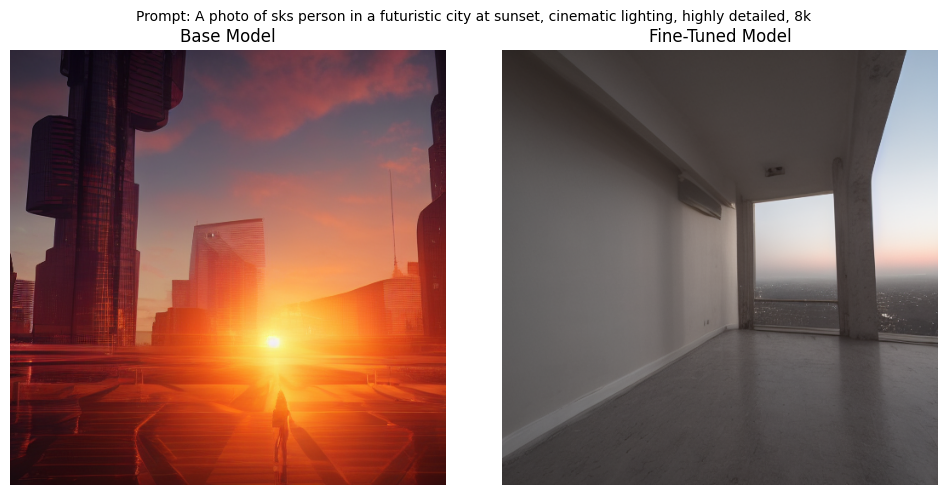


--- Comparing results for: 'A portrait of sks person wearing traditional clothes, beautiful painting, sharp focus, artstation' ---
Generating with Base Model...


  0%|          | 0/30 [00:00<?, ?it/s]

Generating with your Fine-Tuned Model...


  0%|          | 0/30 [00:00<?, ?it/s]

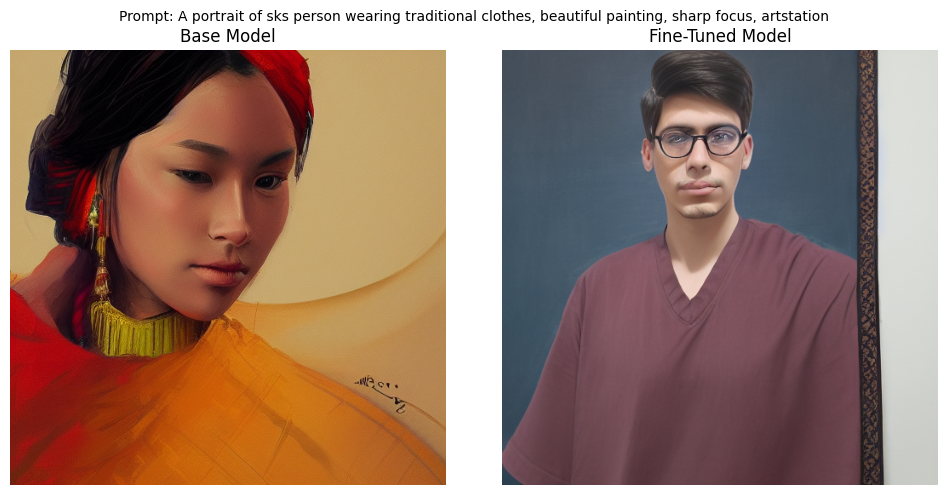

In [17]:
from PIL import Image
import torch
from diffusers import DiffusionPipeline, EulerDiscreteScheduler
import matplotlib.pyplot as plt
import os

# --- Load Both Models ---

# -- YOUR FINE-TUNED MODEL --
output_dir_path = "/content/dreambooth-finetuned-sks-person"
print(f"Loading your fine-tuned model from: {output_dir_path}")

finetuned_pipe = DiffusionPipeline.from_pretrained(
    output_dir_path,
    torch_dtype=torch.float16,
    safety_checker=None
).to("cuda")
finetuned_pipe.scheduler = EulerDiscreteScheduler.from_config(finetuned_pipe.scheduler.config)
print("✅ Your fine-tuned model loaded successfully!")

# -- STANDARD BASE MODEL (FOR COMPARISON) --
base_model_path = "runwayml/stable-diffusion-v1-5"
print(f"\nLoading the standard base model for comparison: {base_model_path}")

base_pipe = DiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    safety_checker=None
).to("cuda")
base_pipe.scheduler = EulerDiscreteScheduler.from_config(base_pipe.scheduler.config)
print("✅ Standard base model loaded successfully!")

# --- Run Inference and Compare ---

prompts_to_test = [
    "A photo of sks person in a futuristic city at sunset, cinematic lighting, highly detailed, 8k",
    "A portrait of sks person wearing traditional clothes, beautiful painting, sharp focus, artstation"
]

base_prompts_to_test = [
    "A photo of a person in a futuristic city at sunset, cinematic lighting, highly detailed, 8k",
    "A portrait of a person wearing traditional clothes, beautiful painting, sharp focus, artstation"
]

for i, prompt in enumerate(prompts_to_test):
    print(f"\n--- Comparing results for: '{prompt}' ---")

    g_cuda = torch.Generator(device='cuda').manual_seed(222)  # Use a fixed seed for a consistent comparison

    # Generate with the standard base model
    print("Generating with Base Model...")
    base_image = base_pipe(
        base_prompts_to_test[i],
        num_inference_steps=30,
        guidance_scale=7.5,
        generator=g_cuda,
    ).images[0]

    # Generate with your fine-tuned model
    print("Generating with your Fine-Tuned Model...")
    finetuned_image = finetuned_pipe(
        prompt,
        num_inference_steps=30,
        guidance_scale=7.5,
        generator=g_cuda,
    ).images[0]

    # Display side-by-side using matplotlib
    plt.figure(figsize=(10, 5))  # Set figure size for side-by-side display
    plt.subplot(1, 2, 1)
    plt.imshow(base_image)
    plt.title("Base Model")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(finetuned_image)
    plt.title("Fine-Tuned Model")
    plt.axis('off')
    plt.suptitle(f"Prompt: {prompt}", fontsize=10)
    plt.tight_layout()
    plt.show()